In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("diamonds.csv",index_col=0)

In [ ]:
df.shape

(53940, 10)

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df_ohe =pd.get_dummies(df)

In [9]:
df_ohe.shape

(53940, 27)

In [10]:
df_ohe.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [35]:
x=df_ohe


In [37]:
x_train, x_test, = train_test_split(x,test_size=0.3,random_state=7)

In [38]:
x_test.shape,x_train.shape

((16182, 27), (37758, 27))

In [39]:
from sklearn.cluster import KMeans

In [40]:
km =KMeans(n_clusters=3,random_state=7)

In [41]:
km.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=7)

In [42]:
km.cluster_centers_

array([[4.91376386e-01, 6.17388128e+01, 5.71741161e+01, 1.45356343e+03,
        4.98974603e+00, 4.99595390e+00, 3.08303544e+00, 2.56577517e-02,
        8.32354860e-02, 4.56838443e-01, 2.19917373e-01, 2.14350946e-01,
        1.45857795e-01, 2.16307893e-01, 1.83518156e-01, 2.08523592e-01,
        1.28984562e-01, 8.14090020e-02, 3.53989998e-02, 1.30028267e-02,
        4.40965427e-02, 2.23526854e-01, 1.15329419e-01, 1.63557295e-01,
        2.32441835e-01, 9.18460535e-02, 1.16199174e-01],
       [1.71419732e+00, 6.16236332e+01, 5.78944583e+01, 1.33132279e+04,
        7.63162525e+00, 7.63679920e+00, 4.69600398e+00, 2.73359841e-02,
        7.08250497e-02, 3.41202783e-01, 3.41202783e-01, 2.19433400e-01,
        8.00198807e-02, 1.11332008e-01, 1.57554672e-01, 2.08499006e-01,
        1.90109344e-01, 1.70228628e-01, 8.22564612e-02, 6.70974155e-03,
        3.13121272e-02, 2.23658052e-01, 2.29870775e-01, 1.47614314e-01,
        2.21172962e-01, 4.82107356e-02, 9.14512922e-02],
       [1.11084086e+00

In [43]:
clust_nos=km.predict(x_test)

In [44]:
clust_nos

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [45]:
len(clust_nos),x_test.shape


(16182, (16182, 27))

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(x_test,clust_nos,random_state=7)

0.6628208250209792

In [62]:
inertia_list=[]
sc_list=[]
for k in range (2,11):
  km= KMeans(k,random_state=7)
  km.fit(x_train)
  clust_nos=km.predict(x_test)
  inertia_list.append(km.inertia_)
  sc_list.append(silhouette_score(x_test,clust_nos))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [58]:
inertia_list

[171597904834.22144,
 72428926612.40598,
 39904492633.801384,
 26191355626.610126,
 17680892885.436028,
 12718507033.604046,
 9869348677.149767,
 7719157520.754606,
 6314804115.344075]

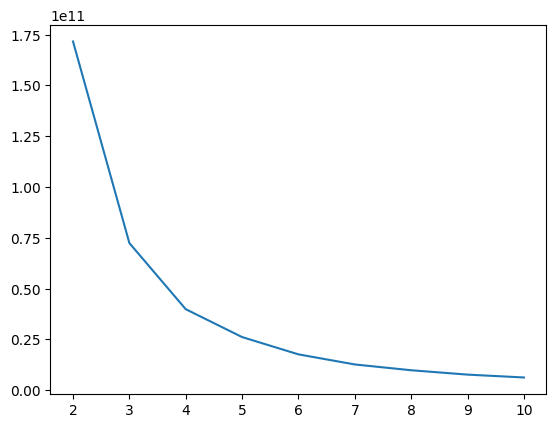

In [59]:
from matplotlib import pyplot as plt
plt.plot(range(2,11),inertia_list)

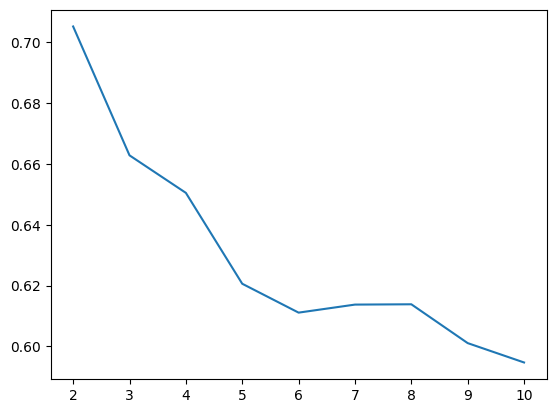

In [63]:
from matplotlib import pyplot as plt
plt.plot(range(2,11),sc_list)